In [ ]:
%pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil, os

taking data of interest from kaggle

In [ ]:
!unzip /content/drive/MyDrive/ML_proj2/train.zip

In [ ]:
dataset = pd.read_csv("/content/_tp.csv")
for id in dataset['recording_id']:
  file_src = "/content/"+id +".flac"
  shutil.copy(file_src, '/content/drive/MyDrive/ML_proj3')

len(os.listdir('/content/drive/MyDrive/ML_proj3'))

Spectrograms & Mel-Spectrograms (saving to drive)

In [ ]:
df = pd.read_csv("/content/train_tp.csv")
audio_path = '/content/drive/MyDrive/ML_proj3'
min_freq = df['f_min'].min()
max_freq = df['f_max'].max()
duration = 8

for index in range(0, len(df)):
  t_min = df.iloc[index]['t_min'] 
  t_max = df.iloc[index]['t_max']
  species_id = df.iloc[index]['species_id']
  recording_id = df.iloc[index]['recording_id']
  path_file = audio_path + '/' + recording_id +'.flac'

  ##load file
  data, samplerate = librosa.load(path_file, sr=None)

  ##crop and pad sample by mirroring signal
  length = duration*samplerate
  cropped_data = data[round(t_min*samplerate):round(t_max*samplerate)]
  pad_length = length - len(cropped_data)
  #padded_data = np.pad(cropped_data,int(pad_length/2), mode='constant',constant_values=0)
  padded_data = np.pad(cropped_data,int(pad_length/2), mode='reflect')

  ##spectrogram
  spec = np.abs(librosa.stft(padded_data, hop_length=512))
  spec = librosa.amplitude_to_db(spec, ref=np.max)
  librosa.display.specshow(spec, sr=samplerate, x_axis='time', y_axis='linear', fmax=max_freq, fmin=min_freq)
  plt.ylim(min_freq,max_freq)
  plt.axis('off')
  plt.savefig('/content/drive/MyDrive/ML_spectro/'+ str(recording_id) + '_'+ str(species_id) + '_' + index + '.png')
  plt.close()

  ##mel-spectrogram
  plt.figure()
  M = librosa.feature.melspectrogram(y=padded_data, sr=samplerate)
  M_db = librosa.power_to_db(M, ref=np.max)
  librosa.display.specshow(M_db, y_axis='mel', x_axis='s', fmin = min_freq, fmax = max_freq)
  plt.xlim(0,duration)
  plt.ylim(min_freq,max_freq)
  plt.axis('off')
  plt.savefig('/content/drive/MyDrive/ML_melSpectro/'+ str(recording_id) + '_'+ str(species_id) + '_' + index + '.png')
  plt.close()

In [ ]:
len(os.listdir('/content/drive/MyDrive/ML_melSpectro')), len(os.listdir('/content/drive/MyDrive/ML_spectro')), len(df)

(1216, 1216, 1216)

Next is an example showing padding, spectrogram and mel-spectrogram of one audio sample.

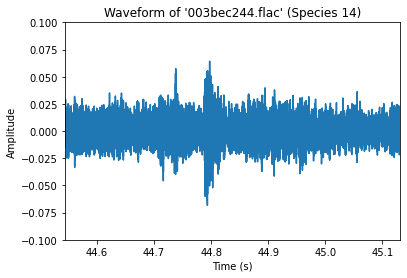

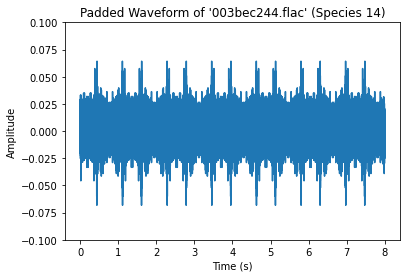

Text(0.5, 1.0, "Mel-Spectrogram of '003bec244.flac' (Species 14 - Post Padding)")

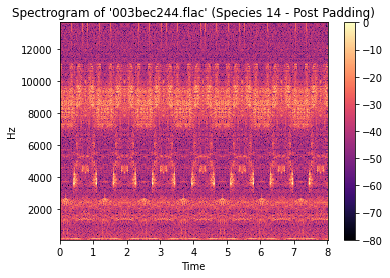

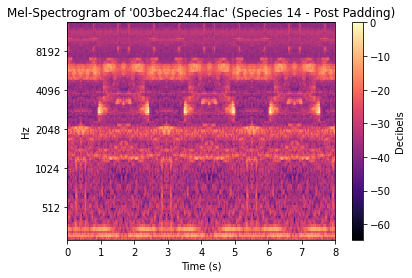

In [ ]:
df = pd.read_csv("/content/train_tp.csv")
audio_path = '/content/drive/MyDrive/ML_proj3'
min_freq = df['f_min'].min()
max_freq = df['f_max'].max()
duration = 8

index = 0
t_min = df.iloc[index]['t_min'] 
t_max = df.iloc[index]['t_max']
species_id = df.iloc[index]['species_id']
recording_id = df.iloc[index]['recording_id']
path_file = audio_path + '/' + recording_id +'.flac'

##load file
data, samplerate = librosa.load(path_file, sr=None)

times = np.linspace(0,len(data),len(data))/samplerate
plt.plot(times,data)
plt.xlim(t_min, t_max)
plt.ylim(-.1,.1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Waveform of '{0}.flac' (Species {1})".format(recording_id,species_id))
plt.show()

##crop and pad sample by mirroring signal
length = duration*samplerate
cropped_data = data[round(t_min*samplerate):round(t_max*samplerate)]
pad_length = length - len(cropped_data)
padded_data = np.pad(cropped_data,int(pad_length/2), mode='reflect')

times = np.linspace(0,len(padded_data),len(padded_data))/samplerate
plt.plot(times,padded_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-.1,.1)
plt.title("Padded Waveform of '{0}.flac' (Species {1})".format(recording_id,species_id))
plt.show()

##spectrogram
spec = np.abs(librosa.stft(padded_data, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=samplerate, x_axis='time', y_axis='linear', fmax=max_freq, fmin=min_freq)
plt.ylim(min_freq,max_freq)
plt.colorbar()
plt.title("Spectrogram of '{0}.flac' (Species {1} - Post Padding)".format(recording_id,species_id))


##mel-spectrogram
plt.figure()
M = librosa.feature.melspectrogram(y=padded_data, sr=samplerate)
M_db = librosa.power_to_db(M, ref=np.max)
librosa.display.specshow(M_db, y_axis='mel', x_axis='s', fmin = min_freq, fmax = max_freq)
plt.xlim(0,duration)
plt.ylim(min_freq,max_freq)
plt.colorbar(label='Decibels')
plt.title("Mel-Spectrogram of '{0}.flac' (Species {1} - Post Padding)".format(recording_id,species_id))
  